# 一、数据分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('autism_screening.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


A1-A10 调查问卷的结果   
gender 性别   
ethnicity 种族   
jundice  性情乖张    
austim  家族中是否有自闭症患者    
contry_of_res  国籍   
used_app_before  是否使用app自测是否有自闭症   
result A1 - A10的和  有待验证  
age_desc  患者年龄  
relation  是否有人陪同看病  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), int64(10), object(9)
memory usage: 115.6+ KB


In [5]:
# age 设置 100为最大值
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [6]:
# age 有异常值（噪音值） 上限100  
# 删除  找到所有年龄大于100岁的索引值，根据索引值删除即可
index = df[df['age']>100].index
df.drop(index=index, inplace=True)
df.describe()
# 直接保存年龄在100岁以下的数据

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,701.000000,703.000000
mean,0.721195,0.453770,0.458037,0.496444,0.499289,0.284495,0.418208,0.650071,0.324324,0.574680,29.194009,4.880512
std,0.448731,0.498213,0.498591,0.500343,0.500355,0.451495,0.493616,0.477287,0.468455,0.494743,9.711526,2.498992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


In [7]:
# 处理缺失值  age 缺2项  均值填充
df.fillna(df['age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           703 non-null int64
A2_Score           703 non-null int64
A3_Score           703 non-null int64
A4_Score           703 non-null int64
A5_Score           703 non-null int64
A6_Score           703 non-null int64
A7_Score           703 non-null int64
A8_Score           703 non-null int64
A9_Score           703 non-null int64
A10_Score          703 non-null int64
age                703 non-null float64
gender             703 non-null object
ethnicity          703 non-null object
jundice            703 non-null object
austim             703 non-null object
contry_of_res      703 non-null object
used_app_before    703 non-null object
result             703 non-null float64
age_desc           703 non-null object
relation           703 non-null object
Class/ASD          703 non-null object
dtypes: float64(2), int64(10), object(9)
memory usage: 120.8+ KB


In [8]:
# A1-A10 的和 result  
# 先算A1-A10的和
df1 = df.iloc[:, :10]
# A1-A10的和如果等于result，不等号的结果都是False（0），
(df1.sum(axis=1) != df['result']).sum()

0

In [9]:
# result 得分不同的情况下，患病的概率是否不同
df.groupby(['result', 'Class/ASD']).count()['age']

result  Class/ASD
0.0     NO            14
1.0     NO            32
2.0     NO            74
3.0     NO           110
4.0     NO           131
5.0     NO            83
6.0     NO            70
7.0     YES           57
8.0     YES           55
9.0     YES           47
10.0    YES           30
Name: age, dtype: int64

In [10]:
# 去除A1-A10 以及result
df = df.iloc[:, 10:]
del df['result']
df.head()

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,26.0,f,White-European,no,no,United States,no,18 and more,Self,NO
1,24.0,m,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,27.0,m,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,35.0,f,White-European,no,yes,United States,no,18 and more,Self,NO
4,40.0,f,?,no,no,Egypt,no,18 and more,?,NO


In [11]:
df['ethnicity'].value_counts()

White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [12]:
df['relation'].value_counts()

Self                        521
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [13]:
# 修改性别为0或者1
df['gender'] = df['gender'].map({'f': 1, 'm': 0})

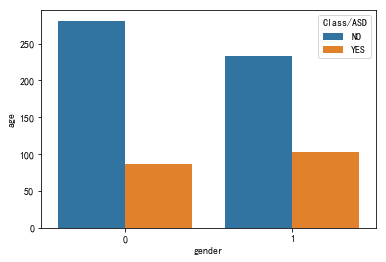

In [14]:
# 检查gender和是否患病之间的关系
df1 = df.groupby(['gender', 'Class/ASD']).count()['age'].reset_index()
sns.barplot(x='gender', y='age', hue='Class/ASD', data=df1)

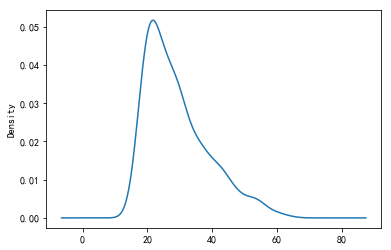

In [15]:
# 分析age的特征情况
df['age'].plot(kind='kde')

In [16]:
df['age'].describe()

count    703.000000
mean      29.194009
std        9.697682
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

In [17]:
# age分段 22-    23-30    30-50   50+
def fn(x):
    if x <= 22:
        return 0
    elif x>=23 and x <= 29:
        return 1
    elif x>=30 and x<=49:
        return 2
    else:
        return 3
df['age'] = df['age'].map(fn)
df.head()

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,White-European,no,no,United States,no,18 and more,Self,NO
1,1,0,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,1,0,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,2,1,White-European,no,yes,United States,no,18 and more,Self,NO
4,2,1,?,no,no,Egypt,no,18 and more,?,NO


Text(0, 0.5, 'num')

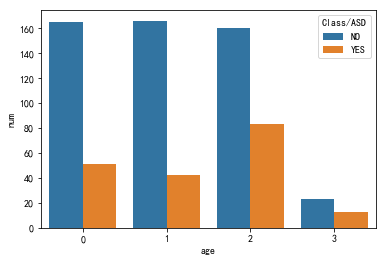

In [18]:
# 分析age和Class/ASD之间关系
df1 = df.groupby(['age', 'Class/ASD']).count()['gender'].reset_index()
sns.barplot(x='age', y='gender', hue='Class/ASD', data=df1)
plt.ylabel('num')

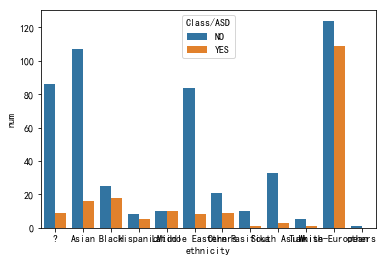

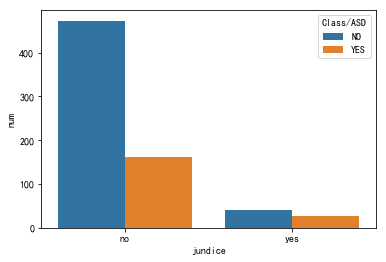

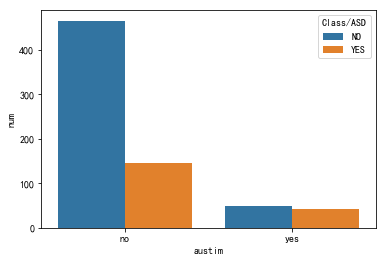

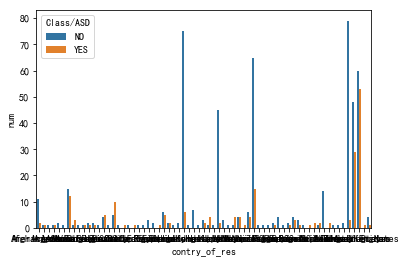

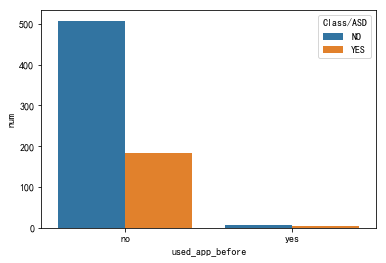

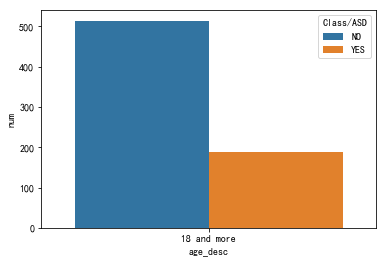

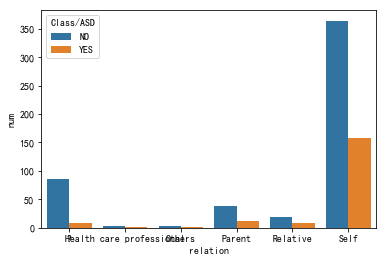

In [19]:
def show_tz(col):
    df1 = df.groupby([col, 'Class/ASD']).count()['gender'].reset_index()
    sns.barplot(x=col, y='gender', hue='Class/ASD', data=df1)
    plt.ylabel('num')
    plt.show()
cols = df.iloc[:, 2:-1].columns
for i in cols:
    show_tz(i)

In [20]:
# ethnicity 相似比例值合并
# 统计没有得自闭症情况下不同种族人数
df1 = df[df['Class/ASD']=='NO']['ethnicity'].value_counts().reset_index()
# 统计患有自闭症情况下不同种族的人数
df2 = df[df['Class/ASD']=='YES']['ethnicity'].value_counts().reset_index()
# df1和df2中每行中种族不一致
# print(df1.head())
# print(df2.head())
df3 = pd.merge(df1, df2, on='index')
# 计算比例  患病人数/总人数
df3['rate'] = df3['ethnicity_y']/(df3['ethnicity_x']+df3['ethnicity_y'])
df3.sort_values('rate')

,index,ethnicity_x,ethnicity_y,rate
4,South Asian,33,3,0.083333
3,Middle Eastern,84,8,0.086957
8,Pasifika,10,1,0.090909
2,?,86,9,0.094737
1,Asian,107,16,0.130081
10,Turkish,5,1,0.166667
6,Others,21,9,0.300000
9,Hispanic,8,5,0.384615
5,Black,25,18,0.418605
0,White-European,124,109,0.467811


In [21]:
# ethnicity 按照患病比例进行分组   rate小于0.1 0      0.1-0.3 1      大于0.3 2
# 获取患病比例小于0.1的所有种族名称
e1 = df3[df3['rate']<=0.1]['index'].values
e3 = df3[df3['rate']>=0.3]['index'].values
def fn(x):
    if x in e1:
        return 0
    elif x in e3:
        return 2
    else:
        return 1
df['ethnicity'] = df['ethnicity'].map(fn)
df.head()

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,2,no,no,United States,no,18 and more,Self,NO
1,1,0,2,no,yes,Brazil,no,18 and more,Self,NO
2,1,0,2,yes,yes,Spain,no,18 and more,Parent,YES
3,2,1,2,no,yes,United States,no,18 and more,Self,NO
4,2,1,0,no,no,Egypt,no,18 and more,?,NO


In [22]:
# contry_of_res 合并
# 分别查看contry_of_res 字段中患病和没有患病的人数
df1 = df[df['Class/ASD']=='NO']['contry_of_res'].value_counts().reset_index()
df2 = df[df['Class/ASD']=='YES']['contry_of_res'].value_counts().reset_index()
df3 = pd.merge(df1, df2, on='index')
df3['rate'] = df3['contry_of_res_y'] / (df3['contry_of_res_y'] + df3['contry_of_res_x'])
df3.sort_values('rate')

,index,contry_of_res_x,contry_of_res_y,rate
0,United Arab Emirates,79,3,0.036585
5,Jordan,45,2,0.042553
1,India,75,6,0.074074
7,Afghanistan,11,2,0.153846
2,New Zealand,65,15,0.187500
13,Viet Nam,4,1,0.200000
16,Saudi Arabia,3,1,0.250000
17,Bangladesh,2,1,0.333333
21,Pakistan,2,1,0.333333
19,Romania,2,1,0.333333


In [23]:
# 根据结果进行分析
# rate  <=0.2 0  <= 0.4 1   <=0.6  2   <=0.8  3
r1 = df3[df3['rate']<=0.2]['index'].values
r2 = df3[df3['rate']<=0.4]['index'].values
r3 = df3[df3['rate']<=0.6]['index'].values
r4 = df3[df3['rate']<=0.8]['index'].values

def fn(x):
    if x in r1:
        return 0
    elif x in r2:
        return 1
    elif x in r3:
        return 2
    else:
        return 3
df['contry_of_res'] = df['contry_of_res'].map(fn)
df.head()

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,2,no,no,2,no,18 and more,Self,NO
1,1,0,2,no,yes,2,no,18 and more,Self,NO
2,1,0,2,yes,yes,3,no,18 and more,Parent,YES
3,2,1,2,no,yes,2,no,18 and more,Self,NO
4,2,1,0,no,no,3,no,18 and more,?,NO


In [24]:
# age_desc  删除
del df['age_desc']

In [25]:
# relation  合并
# 分析患病和为患病所占的人数
df1 = df[df['Class/ASD']=='NO']['relation'].value_counts().reset_index()
df2 = df[df['Class/ASD']=='YES']['relation'].value_counts().reset_index()
df3 = pd.merge(df1, df2, on='index')
df3['rate'] = df3['relation_y'] / (df3['relation_y'] + df3['relation_x'])
df3.sort_values('rate')

,index,relation_x,relation_y,rate
1,?,86,9,0.094737
4,Others,4,1,0.200000
2,Parent,38,12,0.240000
5,Health care professional,3,1,0.250000
0,Self,364,157,0.301344
3,Relative,19,9,0.321429


In [26]:
# <=0.1  0    <= 0.3 1     <=0.5  2
r1 = df3[df3['rate']<=0.1]['index'].values
r2 = df3[df3['rate']<=0.3]['index'].values
r3 = df3[df3['rate']<=0.5]['index'].values
def fn(x):
    if x in r1:
        return 0
    elif x in r2:
        return 1
    else:
        return 2
df['relation'] = df['relation'].map(fn)
df.head()

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,relation,Class/ASD
0,1,1,2,no,no,2,no,2,NO
1,1,0,2,no,yes,2,no,2,NO
2,1,0,2,yes,yes,3,no,1,YES
3,2,1,2,no,yes,2,no,2,NO
4,2,1,0,no,no,3,no,0,NO


# 二、分析预测

## 2.1特征处理

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
# 标签化，
df['jundice'] = LabelEncoder().fit_transform(df['jundice'])
df['austim'] = LabelEncoder().fit_transform(df['austim'])
df['used_app_before'] = LabelEncoder().fit_transform(df['used_app_before'])
# 特征 标签
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]
# 独热编码
x = OneHotEncoder().fit_transform(x).toarray()
# Y YES--》1  NO--》0
y = df['Class/ASD'].map({'YES': 1, 'NO': 0})
print(x[:5])
print(y.head())

[[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]]
0    0
1    0
2    1
3    0
4    0
Name: Class/ASD, dtype: int64


D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## 2.2 模型预测

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [31]:
# 切分数据集  
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123, test_size=0.2)

### 2.2.1逻辑回归

In [32]:
lr = LogisticRegression() # C 正则化系数倒数
pg = {'C': np.arange(1, 11)}
model = GridSearchCV(lr, pg, cv=5)
model.fit(x_train, y_train)
print(model.best_score_)
print(model.best_params_)

0.7526690391459074
{'C': 6}


### 2.2.2KNN K近邻

In [33]:
knn = KNeighborsClassifier()
pg = {'n_neighbors': np.arange(3, 8), 'p':[1, 2], 'weights': ['uniform', 'distance']}
model = GridSearchCV(knn, pg, cv=5)
model.fit(x_train, y_train)
print(model.best_score_)
print(model.best_params_)

0.7508896797153025
{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


### 2.2.3 决策树

In [34]:
dt = DecisionTreeClassifier()
pg = {'max_depth': np.arange(3, 8)}
model = GridSearchCV(dt, pg, cv=5)
model.fit(x_train, y_train)
print(model.best_score_)
print(model.best_params_)

0.7633451957295374
{'max_depth': 4}


### 2.2.4 随机森林

In [36]:
rf = RandomForestClassifier()
pg = {'n_estimators': np.arange(1,15) * 30, 'max_depth': np.arange(3, 8)}
model = GridSearchCV(rf, pg, cv=5)
model.fit(x_train, y_train)
print(model.best_score_)
print(model.best_params_)

0.7562277580071174
{'max_depth': 6, 'n_estimators': 120}


In [37]:
model = DecisionTreeClassifier(max_depth= 4)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7092198581560284

# 三、分析

In [38]:
df['Class/ASD'].value_counts()

NO     514
YES    189
Name: Class/ASD, dtype: int64

数据类别不平衡

In [39]:
from sklearn.metrics import confusion_matrix # 混淆矩阵

In [40]:
y_ = model.predict(x_test)
confusion_matrix(y_test, y_)

array([[80, 17],
       [24, 20]], dtype=int64)

In [41]:
y_test.value_counts()

0    97
1    44
Name: Class/ASD, dtype: int64